# Project 1: Pairwise global alignment with linear gap cost

**Group 10**

Emma Réka Erdei

Martina Chabadová

Juan Nicolás Quintero Quintero

---

## Introduction
We have implemented **global optimal alignment** using **linear gap cost** with a **backtracking algorithm** and a **global count** function to find the total number of optimal paths. Everything works as expected, and our results match the provided test cases.

## Methods

To implement our solution, we use three different files, one as a helper and two containing the main functions to align the sequences and count the possible optimal alignments:

### Helper Functions (`alignment_utils.py`)
* `read_fasta`: Reads sequences from FASTA files using the `Bio.SeqIO` library.
* `read_cost_matrix`: Reads text file with the cost matrix and the gapcost formated as following:
    n g
    where n is the size of the alphabet and g is the linear gapcost

    next n lines:
    letter cost1 cost2 ... costn
    
    Where the letter is the i'th letter of the alphabet and each row defines the cost of a substitution
    of alphabet[i] to the rest of the alphabet
* `check_sequences_validity`: Checks the validity of all the sequences, verifies that they don't have characters outside of our alphabet   
* `write_alignment_in_fasta`: Writes the output alignment in a fasta file.

### Global Linear Alignment (`global_linear.py`)

Function to get the global pairwise alignment using linear gap cost
    It receives:
    
        - sequences: a list of two sequences that we want to align
        - alphabet: a list of the current alphabet, aligned with the index of the cost matrix
        - cost_matrix: a matrix with the scores of each substitution
        - gap_cost: an integer representing the gap cost on the alignment
        - backtracking: a boolean variable to return an optimal alignment using backtracking, if desired 

We implemented the linear optimal cost finding algorithm using an iterative Dynamic Programming (DP) approach, where we fill the matrix **S** that we saw in class iteratively, row by row to avoid hitting max recursion limits.
* **Initialization**: We create a DP table of dimensions $(n+1) \times (m+1)$. The first row and column are initialized with gap costs scaled by their index ($i \times \text{gap\_cost}$), this reduces the number of iterations and comparisons, followed by the observation that the alignments in the first row and in the first column can only come from a succession of insertions or deletions.
* **Implementation**: The table is filled iteratively (top-left to bottom-right). We chose an iterative approach over recursion to avoid maximum recursion depth issues with long sequences.
* **Backtracking**: If requested, a separate function traverses the score matrix from $(n, m)$ back to $(0, 0)$ to reconstruct the optimal alignment. Opposite to the global score algorithm, we decided to implement the bactracking function with a recursive approach, even if an iterative approach is possible, the recursive approach was more straightforward to implement.

### Global Count (`global_count.py`)
Computes the total number of optimal alignments using a `count_matrix` with the `score_matrix` calculated in `global_linear`.
* **Logic**: We set the first row and column of the count matrix to 1, this is because, as for the score matrix calculation, the alignments in the first row and first column can only come from a series of insertions or deletions. 
* **Calculation**: For each cell, the value is the sum of the count values of its neighbors (diagonal, top, or left) * if and only only if* that neighbor provided the optimal score for the current cell in the score matrix.
* **Result**: The final value is located at the bottom-right corner of the count matrix. 

## Tests


In order to verify the correctness of our implementation, we first created the score matrix, backtracked an alignemnt and counted the possible number of optimal alignments using the same example that we saw in class, where the sequences were:
- acta
- aggt

We verified that, using a cost matrix that assigned a value of 1 to each substitution and a value of 1 to every gap, we had the same result.

After verifying correctness with this simple example, we moved onto the examples provided for the project, where the cost matrix now had a variable cost for the substitutions depending on the type of substitution (transition/traversion) and a gap cost of 5.

For the smaller test cases we verified the cost matrix and for the bigger ones we verified the optimal alignment cost and the number of alignments, getting the same numbers as the file given in the project.

Finally, we took the questions provided and used our implementation to answer them:

### Question 1 (`question1.py`)

Compute the optimal score of an optimal alignment for each pair of the
5 sequences above using global_linear with the score matrix M and gap
cost g(k)=5*k. The result is a 5x5 table where entry (i,j) the optimal
score of an alignment of seq_i and seq_j.

*Result*

  ```
    0  226  206  202  209
  226    0  239  223  220
  206  239    0  219  205
  202  223  219    0  210
  209  220  205  210    0
  ```


### Question 2 (`question2.py`)

Count the optimal score of an optimal alignments for each pair of the
5 sequences above using global_linear with the score matrix M and gap
cost g(k)=5*k. The result is a 5x5 table where entry (i,j) the number 
of optimal alignments of seq_i and seq_j.

*Result*

```
       1      90     192    3168      96
      90       1     384     384    1824
     192     384       1  138240     972
    3168     384  138240       1      16
      96    1824     972      16       1
```

### Question 3

Compute and show an optimal alignment of sequence 1 and 2 using gap 
cost g(k)=5*k

```
>seq1
tatgga-gagaataaaagaactgagagatct-aatgtcgcagtcccgcac-tcgcgagatact-cactaagac-cactgtggaccatatggccataatcaaaaag
>seq2
-atggatgtcaatccga-ctctacttttcctaaaaattccagcgcaaaatgccataag-caccacattcccttatactggagatcct-cca-tacagccatggaa
```



## Experiments

To verify that our implementation matches the theoretical running time of our solution (O(n*m)), we generated multiple random sequences of variable size, and computed the optimal cost of an alignment between them, registering the running time of filling the score matrix. 

To facilitate the analysis, we decided to make the alignment assuming both sequences are of the same length, thus, out solution should have a running time of O(n**2)

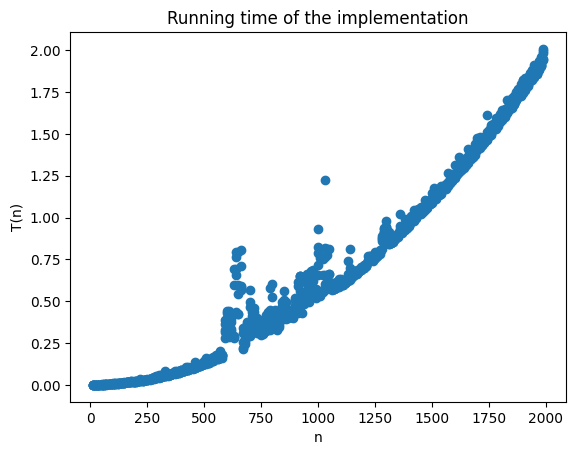

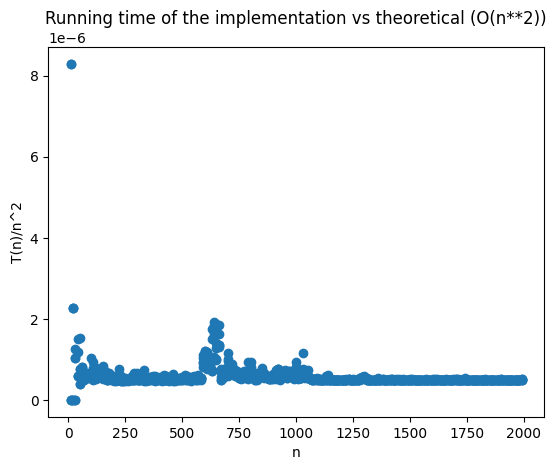

In [ ]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

file = open("tests/result.pkl",'rb')
results = pickle.load(file)
file.close()

results = pd.DataFrame(results)
results = results[results["size"] >10]

plt.scatter(results["size"], results["time"])
plt.xlabel("n")
plt.ylabel("T(n)")
plt.title("Running time of the implementation")
plt.show()

plt.scatter(results["size"], results["time"]/(results["size"]**2))
plt.xlabel("n")
plt.ylabel("T(n)/n^2")
plt.title("Running time of the implementation vs theoretical (O(n**2))")
plt.show()

As we can see, the running time of the implementation is O(n**2), showing a horizontal line when compared with the theoretical time in the second plot with come deviations when the input size is around 600, this is most likely a hardware deviation, generated by other processes running at the same time as the program. 

Thus, we can conclude that the implementation is correct.